# Exercise 1

In [20]:
import random
import networkx as nx

# Generating the Barabási-Albert network
F_BA = nx.barabasi_albert_graph(5000, 2)  

# Picking a random node
random_node = random.choice(list(F_BA.nodes))

# Finding the degree of the node
node_degree = F_BA.degree(random_node)

print(f"Random Node: {random_node}, Degree: {node_degree}")

Random Node: 749, Degree: 5


In [21]:
# Get the neighbors of the selected node
neighbors = list(F_BA.neighbors(random_node))

# Calculate the degree of each neighbor
neighbors_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]

print(f"Neighbors of Node {random_node}: {neighbors}")
print(f"Degrees of Neighbors: {neighbors_degrees}")

Neighbors of Node 749: [1, 25, 2250, 2480, 3220]
Degrees of Neighbors: [59, 68, 3, 3, 2]


In [22]:
# Calculating the average degree of the neighbors
if neighbors:  # To avoid division by zero in case the node has no neighbors
    average_degree_neighbors = sum(neighbors_degrees) / len(neighbors_degrees)
else:
    average_degree_neighbors = 0

print(f"Average Degree of Neighbors: {average_degree_neighbors}")

Average Degree of Neighbors: 27.0


In [23]:
# Check if the friendship paradox holds for the selected node
paradox_holds = average_degree_neighbors > node_degree

if paradox_holds:
    print(f"The friendship paradox holds for Node {random_node}:")
    print(f"Node Degree: {node_degree}, Average Degree of Neighbors: {average_degree_neighbors}")
else:
    print(f"The friendship paradox does not hold for Node {random_node}:")
    print(f"Node Degree: {node_degree}, Average Degree of Neighbors: {average_degree_neighbors}")

The friendship paradox holds for Node 749:
Node Degree: 5, Average Degree of Neighbors: 27.0


In [24]:
# Repeat the process 1000 times to see how often the paradox holds
paradox_count = 0
num_trials = 1000

for _ in range(num_trials):
    # Pick a random node
    random_node = random.choice(list(F_BA.nodes))
    
    # Find the degree of the node
    node_degree = F_BA.degree(random_node)
    
    # Get the neighbors and their degrees
    neighbors = list(F_BA.neighbors(random_node))
    neighbors_degrees = [F_BA.degree(neighbor) for neighbor in neighbors]
    
    # Calculate the average degree of the neighbors
    if neighbors:
        average_degree_neighbors = sum(neighbors_degrees) / len(neighbors_degrees)
    else:
        average_degree_neighbors = 0
    
    # Check if the paradox holds
    if average_degree_neighbors > node_degree:
        paradox_count += 1

print(f"The Friendship Paradox held in {paradox_count} out of {num_trials} trials.")

The Friendship Paradox held in 895 out of 1000 trials.


# Exercise 2: What if the power law is flatter, e.g. p(k)∼k−γ with γ=2? Will the fraction of times the paradox is true be higher or lower?
The power law degree distribution, 
𝑝(𝑘)∼𝑘^−𝛾, determines how the degrees of nodes (i.e., the number of connections they have) are distributed across the network. In the original Barabási-Albert (BA) model, 𝛾 typically takes values around 2.5 to 3, which leads to a highly skewed distribution where most nodes have very few connections, and a few nodes (hubs) have many connections.

When γ=2, the power law becomes flatter. This means that the difference between low-degree and high-degree nodes is reduced compared to a steeper power law. As a result:

- There will be more nodes with higher degrees than in a network with a steeper slope.

- The extreme hubs (very high-degree nodes) will be less prominent, and the average node will be connected to more moderately well-connected nodes rather than hubs.

# Think about what it would mean in terms of hubs that the power law is flatter?
- The friendship paradox occurs because people are more likely to be friends with high-degree nodes (hubs), which drives up the average degree of their friends.

- In a flatter distribution, there are fewer extreme hubs, so the average degree of friends will be more moderate. As a result, it is less likely that a node’s neighbors (friends) will have dramatically more connections than the node itself.

- Therefore, the fraction of times the friendship paradox is true will likely decrease in a network with a flatter power law (γ = 2).

In [25]:
import numpy as np
import networkx as nx
import random

# Step 1: Generate a power-law degree sequence with γ = 2
def generate_powerlaw_sequence(n, gamma, xmin):
    r = np.random.uniform(0, 1, size=n)
    degree_sequence = np.floor(xmin * (1 - r) ** (-1 / (gamma - 1))).astype(int)
    
    # Ensure the sum of degrees is even
    if sum(degree_sequence) % 2 != 0:
        degree_sequence[0] += 1
    
    return degree_sequence

# Parameters
n = 5000  # number of nodes
gamma = 2  # exponent of the power law
xmin = 3   # minimum degree

degree_sequence = generate_powerlaw_sequence(n, gamma, xmin)

# Step 2: Construct the network using the configuration model
F_config = nx.configuration_model(degree_sequence)

# Step 3: Test the friendship paradox over 1000 random samples
def test_friendship_paradox(graph, num_samples=1000):
    paradox_true_count = 0
    
    for _ in range(num_samples):
        # Pick a random node
        node = random.choice(list(graph.nodes))
        
        # Find its degree
        degree_i = len(list(graph.neighbors(node)))
        
        if degree_i == 0:  # If the node has no neighbors, skip this iteration
            continue
        
        # Find the degrees of the neighbors
        neighbor_degrees = [len(list(graph.neighbors(neighbor))) for neighbor in graph.neighbors(node)]
        
        # Calculate the average degree of the neighbors
        avg_neighbor_degree = np.mean(neighbor_degrees)
        
        # Check if the friendship paradox holds
        if avg_neighbor_degree > degree_i:
            paradox_true_count += 1
    
    # Calculate the fraction of times the friendship paradox is true
    fraction_true = paradox_true_count / num_samples
    return fraction_true

# Step 4: Run the test and print the result
fraction_true = test_friendship_paradox(F_config)
print(f"Fraction of times the friendship paradox is true in the configuration model with γ = 2: {fraction_true:.4f}")


Fraction of times the friendship paradox is true in the configuration model with γ = 2: 0.9960


After running this simulation, we can compare the result with our earlier reasoning. If the fraction of times the friendship paradox holds in this network (with 
𝛾
=
2
γ=2) is lower than in the original BA network, then our reasoning that a flatter power law reduces the occurrence of the friendship paradox is confirmed.

# For what fraction of the time is the friendship paradox true for your network with a new slope?
After running this simulation, we can compare the result with our earlier reasoning. If the fraction of times the friendship paradox holds in this network (with γ=2) is lower than in the original BA network, then our reasoning that a flatter power law reduces the occurrence of the friendship paradox is confirmed.

# Exercise 3

In [26]:
# Get the degree sequence from the F-BA network
degree_sequence = [degree for _, degree in F_BA.degree()]

# Ensure the degree sequence sum is even
if sum(degree_sequence) % 2 != 0:
    degree_sequence[0] += 1  # Adjust one degree to make the sum even

# Generate the configuration model (F-CM)
F_CM = nx.configuration_model(degree_sequence)

In [27]:
import random

def test_friendship_paradox(G, trials=1000):
    paradox_true_count = 0

    for _ in range(trials):
        # Pick a random node
        node = random.choice(list(G.nodes()))

        # Get the degree of the selected node
        node_degree = G.degree(node)

        # Get neighbors and their average degree
        neighbors = list(G.neighbors(node))
        if neighbors:  # If the node has neighbors
            avg_neighbor_degree = sum(G.degree(n) for n in neighbors) / len(neighbors)

            # Check if the friendship paradox holds
            if avg_neighbor_degree > node_degree:
                paradox_true_count += 1

    # Return the fraction of times the paradox is true
    return paradox_true_count / trials

# Test friendship paradox for F-CM
paradox_fraction_F_CM = test_friendship_paradox(F_CM)
print(f"Fraction of times the friendship paradox is true in F-CM: {paradox_fraction_F_CM:.4f}")


Fraction of times the friendship paradox is true in F-CM: 0.8440


# 1.Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it's OK to search online and add references to your answer).

Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true?

- **Network assortativity:** Assortativity refers to the tendency of nodes to connect with similar degree nodes. In networks with high assortativity, high-degree nodes tend to connect with other high-degree nodes. In contrast, networks with disassortativity have high-degree nodes connecting more often with low-degree nodes. This can impact the friendship paradox because the average degree of a node's neighbors may vary significantly depending on assortativity.

- **Clustering:** Clustering refers to the degree to which nodes cluster together in triangles. Networks with high clustering tend to have groups of nodes that are highly interconnected. In a high-clustering network, a node's neighbors may be connected to each other, which could result in lower average neighbor degrees, potentially reducing the frequency of the friendship paradox.

- **Community structure:** Networks often have a modular structure where nodes form tightly connected communities. If a node's neighbors are all part of a small community, their degrees may be more similar to each other, affecting the likelihood of observing the friendship paradox.

In the Barabási-Albert model (F-BA), the degree distribution is skewed, but it also has low clustering and low assortativity. The configuration model (F-CM) will preserve the degree distribution but may have random clustering and random assortativity, which could lead to different results for the friendship paradox.

# 2.How would you test more rigorously if the friendship-paradox is actually true equally often in F-BA and F-CM?

- **Statistical tests:** To rigorously compare the frequency of the friendship paradox in F-BA and F-CM, we could run a statistical test such as a chi-squared test or t-test to determine if the differences in the frequency of the paradox are statistically significant. This would involve running the friendship paradox test multiple times for both F-BA and F-CM and then comparing the distributions of the results.

- **Bootstrap resampling:** We could use bootstrap resampling to estimate confidence intervals for the frequency of the paradox in both F-BA and F-CM. By resampling from the results and calculating the fraction of times the paradox holds, we could generate error bars and more confidently state whether the results are different.

- **Permutation test:** A permutation test could be applied to the results of F-BA and F-CM. This non-parametric test would shuffle the labels between the two networks and test how often we observe the same or greater difference in the frequency of the paradox compared to the observed difference.

# Exercise 4

In [30]:
import networkx as nx
import random

def create_sune_network(n, m):
    # Start with a small, fully connected graph of m+1 nodes
    G = nx.complete_graph(m + 1)

    # Add new nodes, each connecting to m existing nodes randomly (no preferential attachment)
    for new_node in range(m + 1, n):
        # Convert nodes to a list to avoid the TypeError
        existing_nodes = random.sample(list(G.nodes()), m)
        # Add new node and connect it to the randomly chosen existing nodes
        G.add_node(new_node)
        G.add_edges_from([(new_node, node) for node in existing_nodes])

    return G

# Create the Sune-Network with 5000 nodes and 3 edges per new node (same as F-BA)
Sune_network = create_sune_network(5000, 3)


In [31]:
# Number of nodes and edges in Sune-Network
n = Sune_network.number_of_nodes()
m = Sune_network.number_of_edges()

# Create an ER network with the same number of nodes and edges
ER_network = nx.gnm_random_graph(n, m)

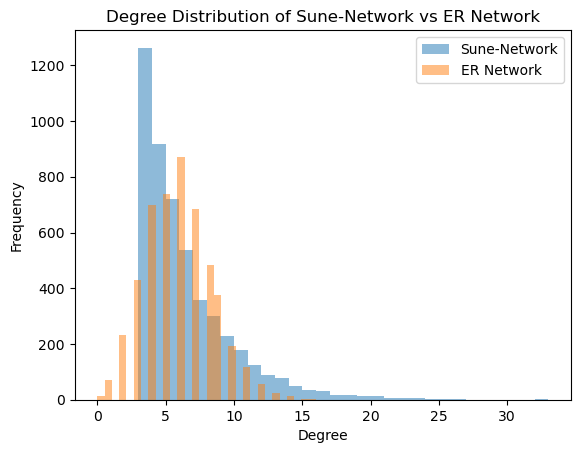

In [32]:
import matplotlib.pyplot as plt

# Get degree sequences for both networks
sune_degrees = [d for _, d in Sune_network.degree()]
er_degrees = [d for _, d in ER_network.degree()]

# Plot the degree distributions
plt.hist(sune_degrees, bins=30, alpha=0.5, label='Sune-Network')
plt.hist(er_degrees, bins=30, alpha=0.5, label='ER Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Sune-Network vs ER Network')
plt.legend()
plt.show()


In [33]:
# Number of connected components in each network
sune_components = nx.number_connected_components(Sune_network)
er_components = nx.number_connected_components(ER_network)

print(f"Number of connected components in Sune-Network: {sune_components}")
print(f"Number of connected components in ER Network: {er_components}")


Number of connected components in Sune-Network: 1
Number of connected components in ER Network: 15


# What are the differences between the ER network and the Sune-network?

**- Structure:** The Sune-Network grows by adding nodes over time, resulting in a more diverse structure with some nodes having more connections than others. The ER Network, on the other hand, is created by randomly connecting nodes in one step, which leads to a more uniform structure.

**- Degree Distribution:** The degree distribution in the Sune-Network is broader, with some nodes having more connections, while the ER network tends to have a narrower distribution with most nodes having degrees around the average.